In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


C:\Users\jessi\AppData\Local\Temp\ipykernel_17640\708437795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Work_Location'],palette='dark')


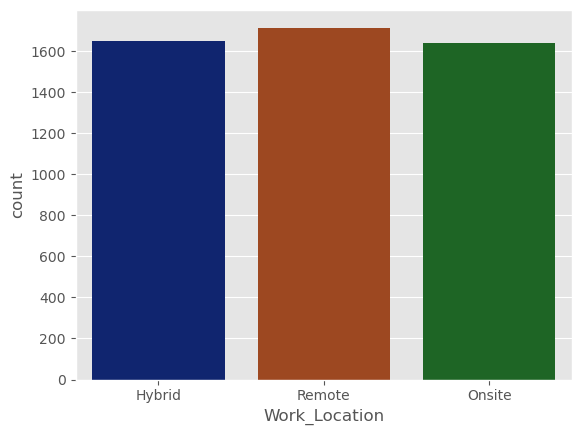

In [4]:
## what is the distribution of work locations (remote,hybrid,onsite) across different industries
plt.style.use('ggplot')
sns.countplot(x = df['Work_Location'],palette='dark')
plt.show()

C:\Users\jessi\AppData\Local\Temp\ipykernel_17640\2133306446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df['Work_Location'],palette='dark')


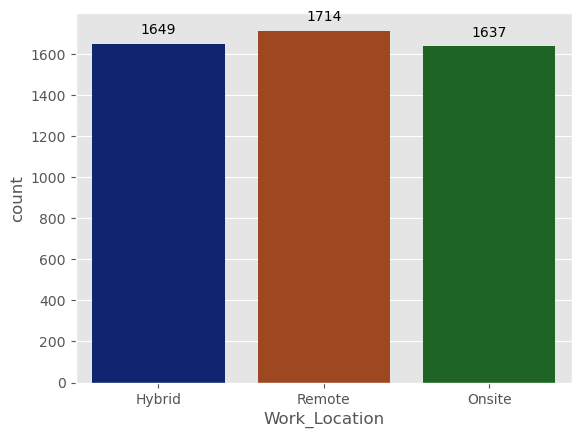

In [7]:
plt.style.use('ggplot')
ax = sns.countplot(x = df['Work_Location'],palette='dark')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),(p.get_x() + p.get_width()/2.,p.get_height()), ha ='center', va='center',xytext = (0,10), textcoords = 'offset points')
plt.show()

In [8]:
fig = px.histogram(x = df['Work_Location'], text_auto=True,color=df['Work_Location'])
fig.show()

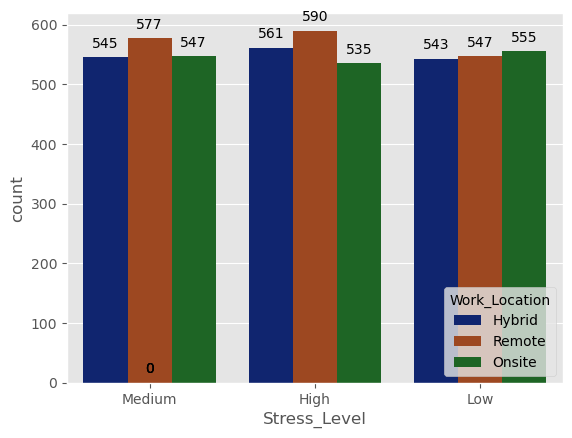

In [9]:
## how do stress levels vary by work location (hybrid,remote,onsite)?
plt.style.use('ggplot')
ax = sns.countplot(x = df['Stress_Level'],palette='dark',hue = df['Work_Location'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),(p.get_x() + p.get_width()/2.,p.get_height()), ha ='center', va='center',xytext = (0,10), textcoords = 'offset points')
plt.show()

In [10]:
fig = px.histogram(x = df['Stress_Level'], text_auto=True,color=df['Work_Location'])
fig.show()

In [12]:
fig = px.histogram(x = df['Stress_Level'], text_auto=True,color=df['Work_Location'],barmode='group')
fig.show()

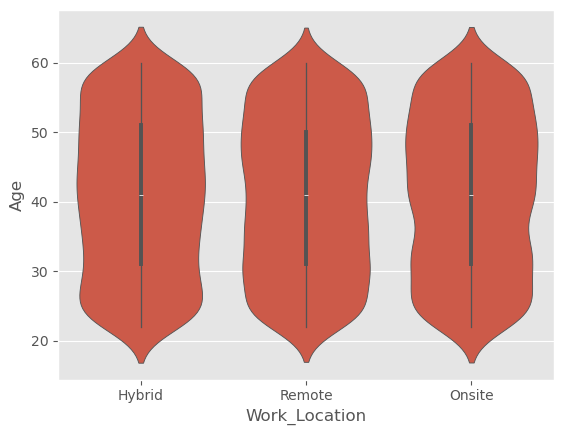

In [13]:
## what is the age distribution of employees across different work locations?
sns.violinplot(x=df['Work_Location'], y = df['Age'])
plt.show()

In [15]:
fig = px.violin(x = df['Work_Location'],y = df['Age'], points='all')
fig.show()

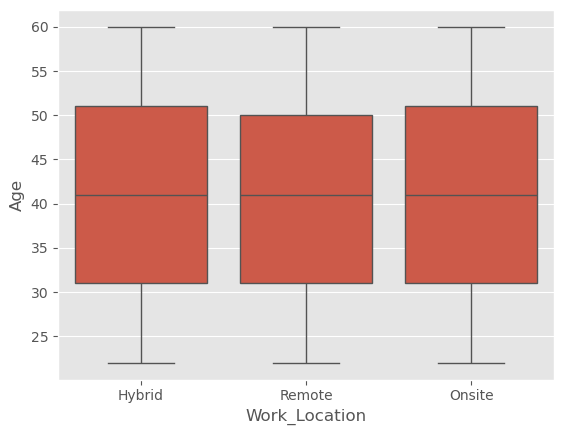

In [16]:
sns.boxplot(x=df['Work_Location'], y = df['Age'])
plt.show()

In [17]:
fig = px.box(x = df['Work_Location'],y = df['Age'], points='all')
fig.show()

In [18]:
## which industries report the highest stress level?
df['Industry'].nunique()

7

In [19]:
df['Industry'].unique()

array(['Healthcare', 'IT', 'Education', 'Finance', 'Consulting',
       'Manufacturing', 'Retail'], dtype=object)

In [21]:
fig = px.histogram(x = df['Industry'], text_auto=True,color=df['Stress_Level'],barmode='group')
fig.show()

In [28]:
## what is the average social isolation rating for each work location
##df.groupby('Country')['Money Laundering Risk Score'].mean()
outcome = df.groupby('Work_Location')['Social_Isolation_Rating'].mean().reset_index()
outcome

,Work_Location,Social_Isolation_Rating
0,Hybrid,3.008490
1,Onsite,3.012828
2,Remote,2.961494


C:\Users\jessi\AppData\Local\Temp\ipykernel_17640\2788886520.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




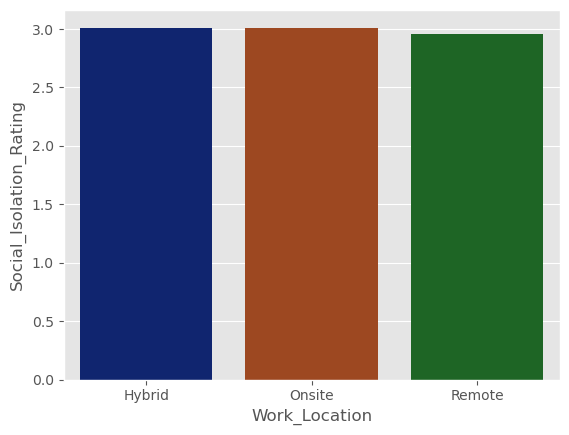

In [29]:
sns.barplot(x = outcome['Work_Location'],y=outcome['Social_Isolation_Rating'],palette='dark')
plt.show()
## what is the average social isolation rating for each work location

In [30]:
fig = px.bar(x = outcome['Work_Location'],y=outcome['Social_Isolation_Rating'],color = outcome['Work_Location'], text = outcome['Social_Isolation_Rating'])
fig.show()

In [31]:
##which job roles report the highest levels of stress?
fig = px.histogram(x = df['Stress_Level'], text_auto=True,color=df['Job_Role'],barmode='group')
fig.show()

In [32]:
fig = px.histogram(x = df['Job_Role'], text_auto=True,color=df['Stress_Level'],barmode='group')
fig.show()

In [ ]:
## how does gender influence job satisfaction in remote, hybrid and onsite settings?
sns.barplot(x = outcome['Gender'],y=outcome[''],palette='dark')
plt.show()

In [33]:
fig = px.histogram(x = df['Work_Location'], color=df['Gender'], facet_col=df['Satisfaction_with_Remote_Work'], text_auto=True, barmode='group')
fig.show()
## how does gender influence job satisfaction in remote, hybrid and onsite settings?

In [ ]:
outcome = df.groupby('Gender')['Social_Isolation_Rating'].mean().reset_index()
outcome

In [ ]:
## What are the top 5 most frequent Industries involved in transactions? Compare their average Amount (USD) and Risk Score.
#df['Year of Release'].value_counts().sort_values(ascending=False)
fig = px.histogram(x = df['Stress_Level'], text_auto=True,color=df['Job_Role'],barmode='group')
fig.show()